In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from influxdb import InfluxDBClient

In [894]:
##### Query Sensor Data from InfluxDB

client = InfluxDBClient(host='floodnet-influxdb.sonycproject.com', ssl=True, port=0, database='db0')

measure = 'distance'
table = 'msg'
app_id = 'deployment_one_app'
dev_id = 'sensor_2'
days_back = 300

query = 'SELECT "%s" ' \
        'FROM "%s" ' \
        'WHERE "app_id" = \'%s\' ' \
        'AND "dev_id" = \'%s\' ' \
        'AND "time" >= now() - %id'\
        % (measure, table, app_id, dev_id, days_back)

data = client.query(query)

value_data = data.raw['series'][0]['values']

dist = pd.DataFrame(value_data, columns =['datetime', 'distance'])

dist['datetime'] = pd.to_datetime(dist['datetime'], format='%Y-%m-%dT%H:%M:%S.%f')
dist['localtime'] = dist['datetime'].dt.tz_convert('US/Eastern')

dist = pd.DataFrame(dist.resample('10min', on='localtime').distance.mean()).reset_index() ## resample at 10_min intervals

print(dist)

                      localtime     distance
0     2020-10-20 14:30:00-04:00  2718.000000
1     2020-10-20 14:40:00-04:00  2726.666667
2     2020-10-20 14:50:00-04:00  2720.500000
3     2020-10-20 15:00:00-04:00  2725.333333
4     2020-10-20 15:10:00-04:00  2724.000000
...                         ...          ...
43195 2021-08-16 13:40:00-04:00  2711.666667
43196 2021-08-16 13:50:00-04:00  2710.000000
43197 2021-08-16 14:00:00-04:00  2713.000000
43198 2021-08-16 14:10:00-04:00  2705.000000
43199 2021-08-16 14:20:00-04:00  2707.000000

[43200 rows x 2 columns]


In [895]:
## Select only overnight data for analysis

overnight_dist = dist[(dist.localtime.dt.hour > 22) | (dist.localtime.dt.hour < 5)]

# Local Weather Aggregation

In [896]:
winds = weather_1.Wind.unique()
wind_deg = [225,247.5,270,292.5,315,337.5,45,90,22.5,0.0,202.5,112.5,180,67.5,135,157.5]

wind_zip = dict(zip(winds, wind_deg))

In [565]:
def format_weather(data):
    
    winds = ['SW', 'WSW', 'West', 'WNW', 'NW', 'NNW', 'NE', 'East', 'NNE',
    'North', 'SSW', 'ESE', 'South', 'ENE', 'SE', 'SSE']
    wind_deg = [225,247.5,270,292.5,315,337.5,45,90,22.5,0.0,202.5,112.5,180,67.5,135,157.5]
    wind_zip = dict(zip(winds, wind_deg))
   
    from datetime import datetime

    data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')
    data = data.rename(columns={'Date_Time':'localtime'})
    data['localtime'] = data['localtime'].dt.tz_localize('EST')
    data['localtime'] = data['localtime'].dt.tz_convert('US/Eastern')
    data['Wind'] = data['Wind'].map(wind_zip)
    
    data = pd.DataFrame(data.resample('10min', on='localtime').mean()).reset_index()

    return data

In [ ]:
## import downloaded weather scraper data from all 4 sources

from datetime import datetime

directoryPath = 'the-weather-scraper-master/Weather Data/'

weather_1 = pd.read_csv(directoryPath+'KNYGOWAN6.csv', parse_dates=[["Date","Time"]]).dropna()
weather_1['Date_Time'] = pd.to_datetime(weather_1['Date_Time'])
weather_1 = weather_1.rename(columns={'Date_Time':'localtime'})
weather_1['localtime'] = weather_1['localtime'].dt.tz_localize('EST')
weather_1['localtime'] = weather_1['localtime'].dt.tz_convert('US/Eastern')

weather_2 = pd.read_csv(directoryPath+'KNYNEWYO1248.csv', parse_dates=[["Date","Time"]]).dropna()
weather_2['Date_Time'] = pd.to_datetime(weather_2['Date_Time'])
weather_2 = weather_2.rename(columns={'Date_Time':'localtime'})
weather_2['localtime'] = weather_2['localtime'].dt.tz_localize('EST')
weather_2['localtime'] = weather_2['localtime'].dt.tz_convert('US/Eastern')

weather_3 = pd.read_csv(directoryPath+'KNYNEWYO1236.csv', parse_dates=[["Date","Time"]]).dropna()
weather_3['Date_Time'] = pd.to_datetime(weather_3['Date_Time'])
weather_3 = weather_3.rename(columns={'Date_Time':'localtime'})
weather_3['localtime'] = weather_3['localtime'].dt.tz_localize('EST')
weather_3['localtime'] = weather_3['localtime'].dt.tz_convert('US/Eastern')

In [862]:
winds = ['SW', 'WSW', 'West', 'WNW', 'NW', 'NNW', 'NE', 'East', 'NNE',
       'North', 'SSW', 'ESE', 'South', 'ENE', 'SE', 'SSE']
wind_deg = [225,247.5,270,292.5,315,337.5,45,90,22.5,0.0,202.5,112.5,180,67.5,135,157.5]
wind_zip = dict(zip(winds, wind_deg))

directoryPath = 'the-weather-scraper-master/Weather Data/'

weather_1 = pd.read_csv(directoryPath+'KNYGOWAN6.csv', parse_dates=[["Date","Time"]]).dropna()
weather_1 = format_weather(weather_1).dropna()


In [566]:
weather_2 = pd.read_csv(directoryPath+'KNYNEWYO1248.csv', parse_dates=[["Date","Time"]])
weather_2 = format_weather(weather_2)

In [567]:
weather_2.head()

,localtime,Temperature_C,Dew_Point_C,Humidity_%,Wind,Speed_kmh,Gust_kmh,Pressure_hPa,Precip_Rate_mm,Precip_Accum_mm,UV,Solar_w/m2
0,2020-10-01 01:00:00-04:00,17.385,11.75,69.0,180.0,3.215,NaN,1007.45,0.0,5.59,1262.5,2.0
1,2020-10-01 01:10:00-04:00,17.305,11.64,69.0,180.0,5.310,NaN,1007.45,0.0,5.59,1262.5,2.0
2,2020-10-01 01:20:00-04:00,17.195,11.75,70.0,180.0,9.655,NaN,1007.45,0.0,5.59,1262.0,2.0
3,2020-10-01 01:30:00-04:00,17.085,11.75,70.5,180.0,5.630,NaN,1007.45,0.0,5.59,1262.5,2.0
4,2020-10-01 01:40:00-04:00,16.970,11.78,71.0,180.0,5.875,NaN,1007.45,0.0,5.59,1262.5,2.0


In [239]:
import glob
import pandas as pd

directoryPath = 'the-weather-scraper-master/Weather Data/'

weather_dict = {}
for i, file_name in enumerate(glob.glob(directoryPath+'*.csv')):
    weather_dict[f"weather_{i+1}"] = pd.read_csv(file_name, low_memory=False)

#for key in weather_dict:
        #weather_dict[key] = format_weather(weather_dict[key])

In [58]:
## resample weather data in 10-minute intervals

weather = pd.DataFrame(weather.resample('10min', on='localtime').mean()).reset_index()

In [863]:
## merge weather and sensor data and drop NaN values

night = overnight_dist.merge(weather_1, on='localtime',how='inner').dropna()
night = night.set_index('localtime').dropna()

In [864]:
night.head()

,distance,variance,Temperature_C,Dew_Point_C,Humidity_%,Wind,Speed_kmh,Gust_kmh,Pressure_hPa,Precip_Rate_mm,Precip_Accum_mm,UV,Solar_w/m2
localtime,,,,,,,,,,,,,
2020-10-15 23:00:00-04:00,2691.333333,-10.666667,18.835,16.445,86.0,202.50,5.790,7.800,1013.21,0.0,0.0,0.0,0.0
2020-10-15 23:10:00-04:00,2691.500000,-10.500000,18.750,16.445,86.5,225.00,5.470,7.560,1013.38,0.0,0.0,0.0,0.0
2020-10-15 23:20:00-04:00,2692.333333,-9.666667,18.720,16.560,87.0,202.50,6.035,8.285,1013.21,0.0,0.0,0.0,0.0
2020-10-15 23:30:00-04:00,2692.000000,-10.000000,18.665,16.445,87.0,202.50,5.310,7.325,1013.21,0.0,0.0,0.0,0.0
2020-10-15 23:40:00-04:00,2694.000000,-8.000000,18.610,16.390,87.0,213.75,4.425,6.440,1013.21,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='localtime'>

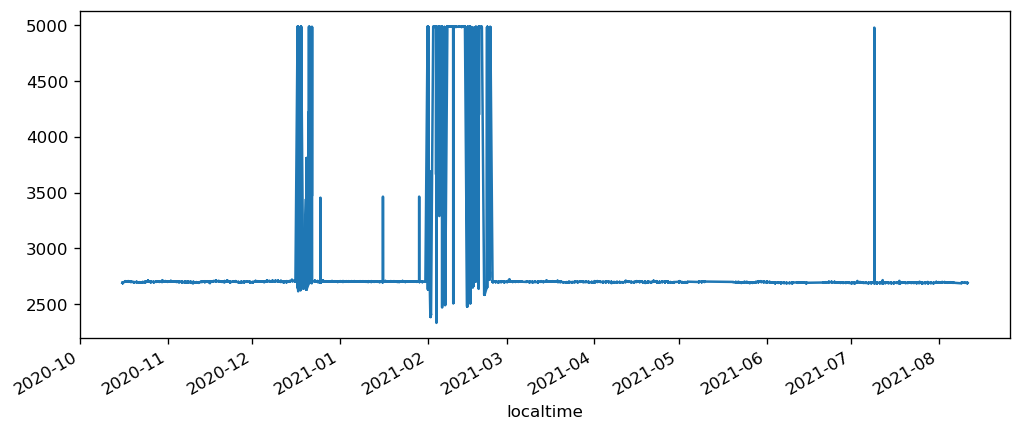

In [865]:
night['distance'].plot(figsize=(10,4))

<AxesSubplot:xlabel='localtime'>

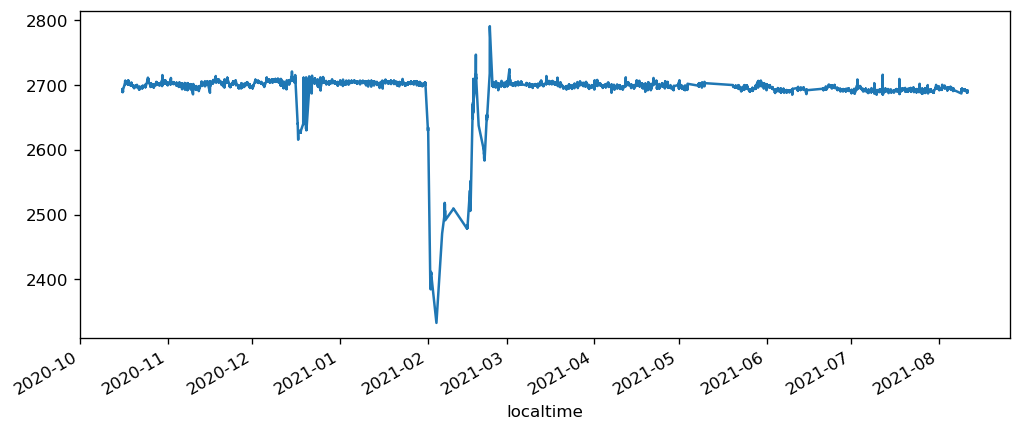

In [866]:
night[(night['distance'] < 2800)]['distance'].plot(figsize=(10,4))

In [867]:
## Drop 5000s, anomalous Snowy February,  December 2020 Flood Event

night_clean = night[night['distance'] < 4500]
night_clean = night_clean[night_clean.index.month != 2] ## Omit Snowy February
night_clean = night_clean[~(night_clean.index.date == pd.Timestamp(month=1, year=2021, day=31))]# Remove 1/31 - also snowy

night_clean = night_clean[(night_clean.index.date < pd.Timestamp(year=2020, month=12, day=15))\
| (night_clean.index.date > pd.Timestamp(year=2020, month=12, day=22))] # Omit December Flood Event

<AxesSubplot:xlabel='localtime'>

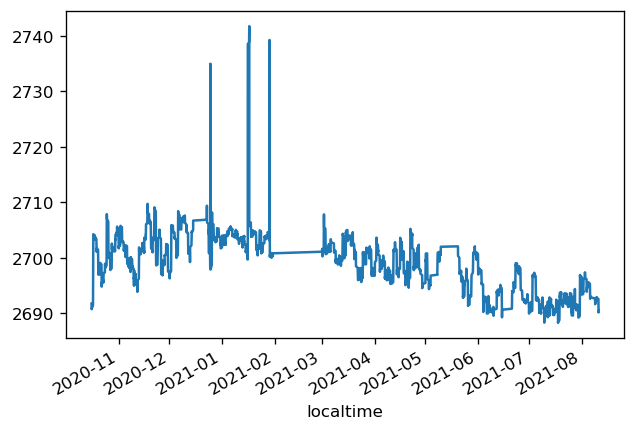

In [868]:
night_clean['distance'].rolling(21, ).mean().plot()

In [869]:
lower = night_clean['distance'].mean() - 3*(night_clean['distance'].std())
upper = night_clean['distance'].mean() + 3*(night_clean['distance'].std())

In [888]:
### Remove readings 3STDs from mean distance
night_clean = night_clean[night_clean['distance'] < upper]

<AxesSubplot:xlabel='localtime'>

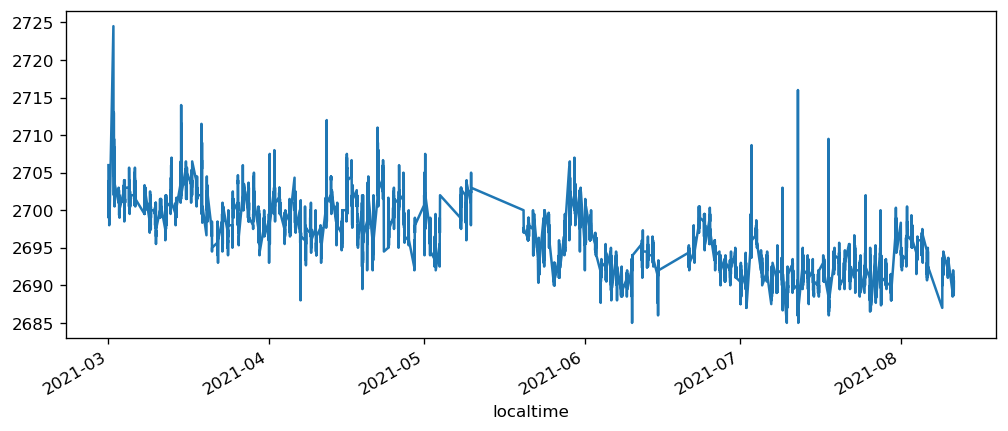

In [889]:
night_clean[night_clean.index.date > pd.Timestamp(year=2021, month=2, day=28)]['distance'].plot(figsize=(10,4))

In [872]:
pd.pivot_table(data=night, columns=night.index.month, values=['distance','Temperature_C', 'Precip_Rate_mm'], aggfunc='mean')

localtime,1,2,3,4,5,6,7,8,10,11,12
Precip_Rate_mm,0.165000,0.151551,0.086088,0.104273,0.348904,0.114670,0.567724,0.028774,0.094115,0.066934,0.190983
Temperature_C,1.161265,0.883772,6.352619,10.381815,15.451326,21.879497,23.486425,21.811635,13.305979,9.948016,3.757730
distance,2716.977728,3978.911365,2700.807742,2699.126546,2697.242449,2693.707176,2694.014785,2693.661426,2700.300687,2701.292818,2813.815742


## Average Daily Distance Measurements

In [890]:
day_agg = night_clean.groupby(night_clean.index.date).mean()

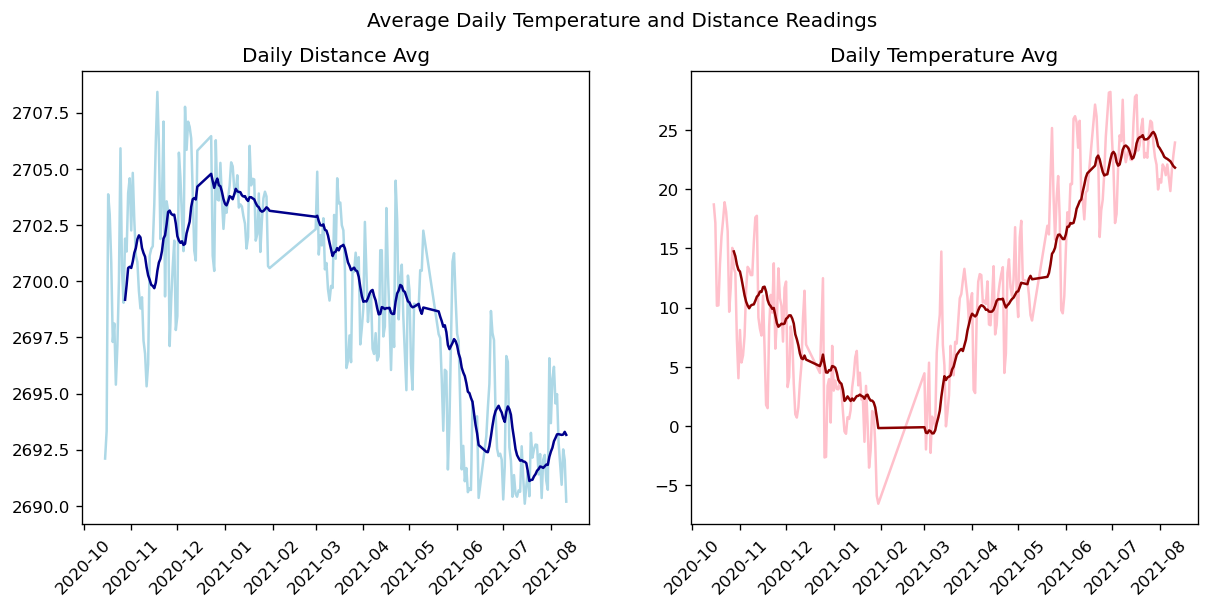

In [891]:
fig, ax = plt.subplots(1,2, figsize= (12,5))

day_agg['distance'].plot(label='Dist', color='lightblue', ax=ax[0])
day_agg['distance'].rolling(14).mean().plot(label='Dist', color='darkblue', ax=ax[0])
ax[0].set_title('Daily Distance Avg')

day_agg['Temperature_C'].plot(label='Temp', color='pink', ax=ax[1])
day_agg['Temperature_C'].rolling(14).mean().plot(label='Temp', color='darkred', ax=ax[1])
plt.suptitle('Average Daily Temperature and Distance Readings')
ax[1].set_title('Daily Temperature Avg')

for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)

In [877]:
from statsmodels.tsa.stattools import adfuller

series=day_agg.distance
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n')
    
if result[1] < 0.05:
    print("The data is stationary")
else:
    print('The data is not stationary')

ADF Statistic: -0.352845
p-value: 0.917679
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


The data is not stationary


<AxesSubplot:>

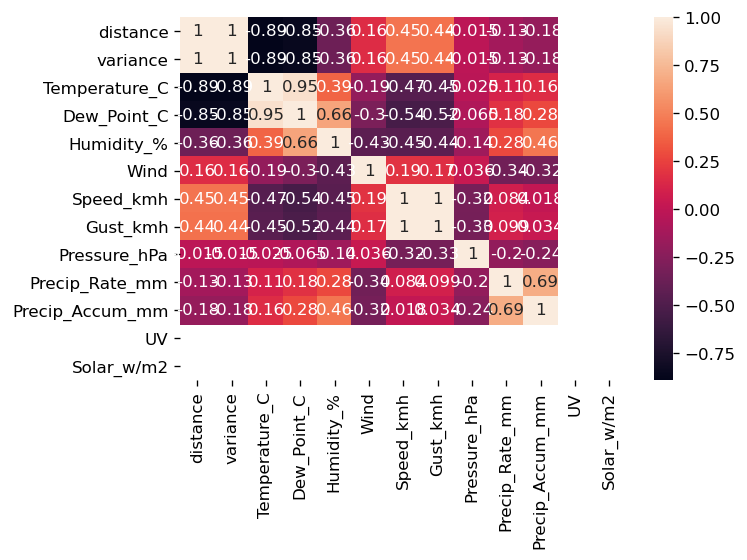

In [893]:
sns.heatmap(day_agg.corr(), annot=True)

Text(0, 0.5, 'Distance')

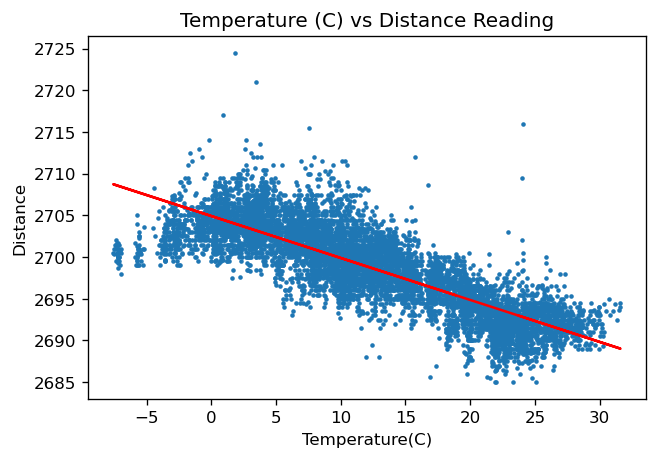

In [921]:
x_1 = night_clean['Temperature_C']
x_2 = night_clean['Dew_Point_C']
y = night_clean['distance']

plt.scatter(x_1, y, s=3)
m, b = np.polyfit(x_1, y, 1)
plt.plot(x_1, m*x_1 + b, color='red')
plt.title('Temperature (C) vs Distance Reading')
plt.xlabel('Temperature(C)')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

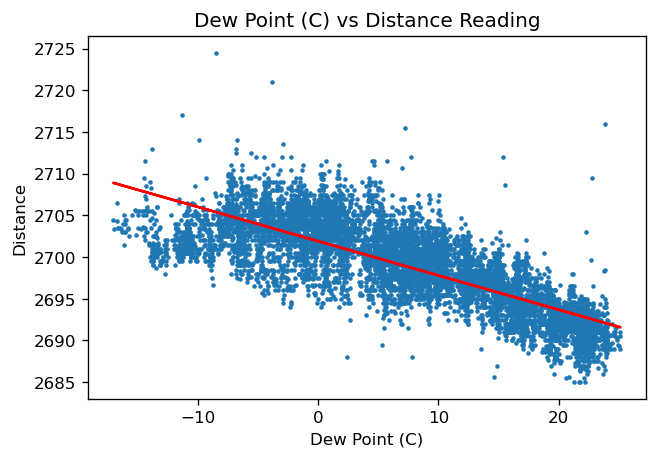

In [922]:
plt.scatter(x_2, y, s=3)
m, b = np.polyfit(x_2, y, 1)
plt.plot(x_2, m*x_2 + b, color='red')
plt.title('Dew Point (C) vs Distance Reading')
plt.xlabel('Dew Point (C)')
plt.ylabel('Distance')

# Time Series Testing

In [416]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

In [494]:
(night_clean['distance'].rolling(50).mean()[-50]) - (night_clean['distance'].rolling(50).mean()[50])

-2.5966666666663514

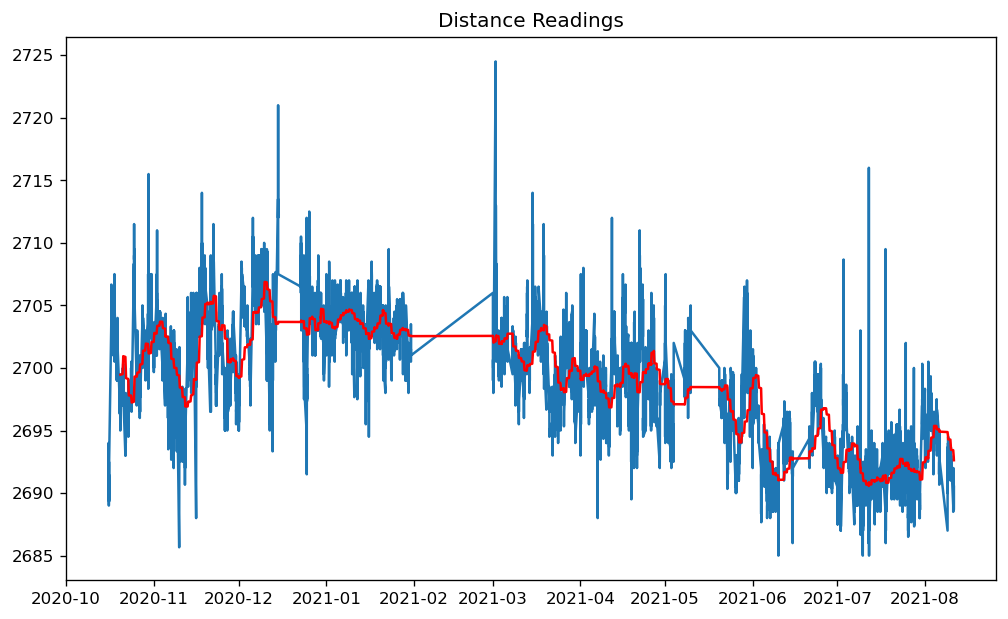

In [644]:
plt.figure(figsize = (10,6))
plt.plot(night_clean.index,night_clean.distance, label = 'distance')
plt.plot(night_clean.index,night_clean.distance.rolling(window = 180).mean(), label = 'distance', color = 'red')
plt.title('Distance Readings')
plt.show()

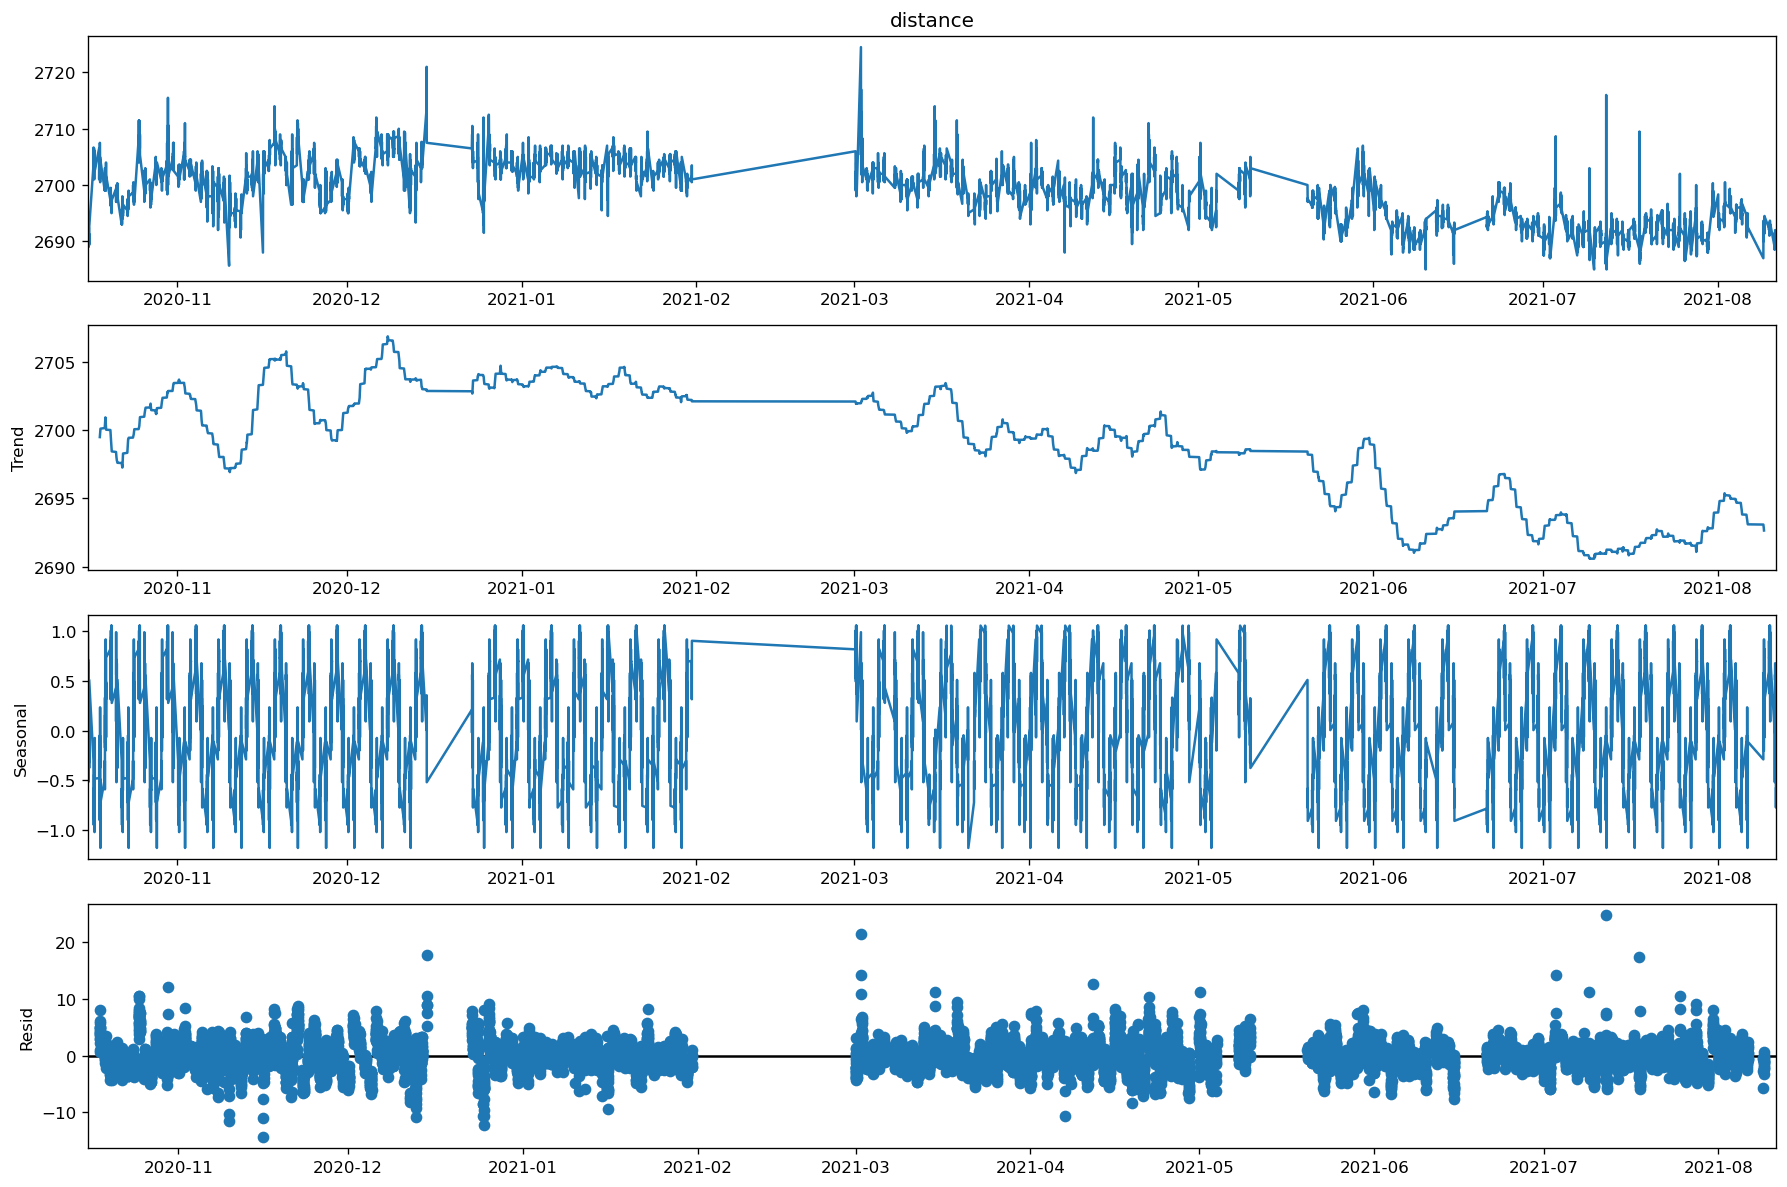

In [572]:
res = sm.tsa.seasonal_decompose(night_clean['distance'],model='additive',freq=180)
res.plot()
plt.show()

<AxesSubplot:xlabel='localtime'>

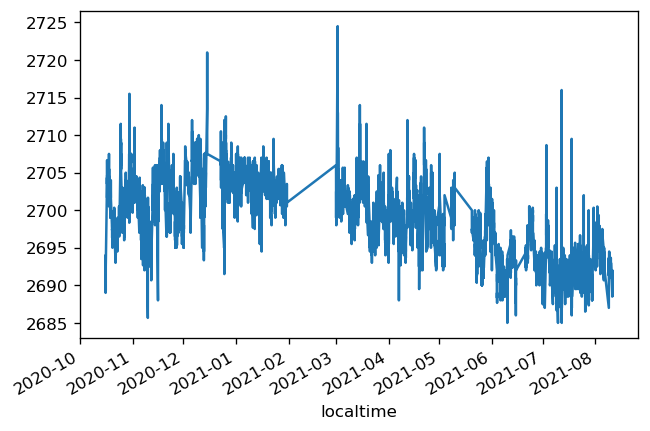

In [702]:
night_clean['distance'].plot()

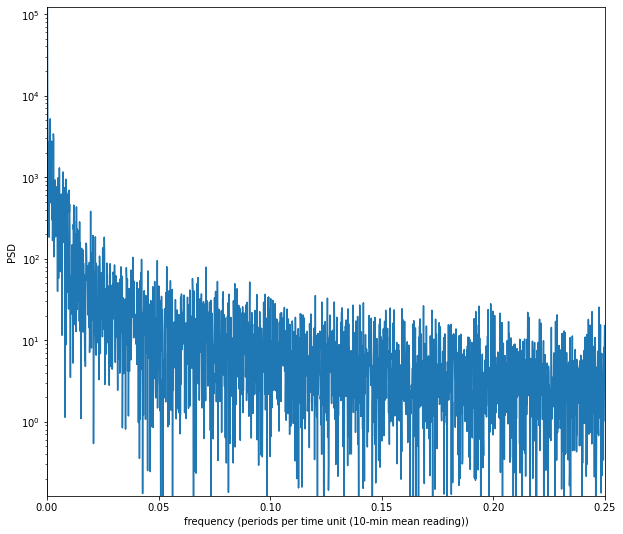

Strongest period length = 180.8936170212766


In [446]:
f, PSD = scipy.signal.periodogram(night_clean.distance)
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (10-min mean reading))')
plt.ylabel('PSD')
plt.xlim(0,0.25) #show frequencies within 1/4..1/200
plt.ylim(max(PSD)/1e6,max(PSD)) #show strength up to 1e-6 of the max
#filter outputs - periods shorter than 4 years
PSD = PSD[f>0.005]
f = f[f>0.005]
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) #report the length of the strongest period
#transformting the frequency into the period length, using 1=frequency (number of periods)*period length

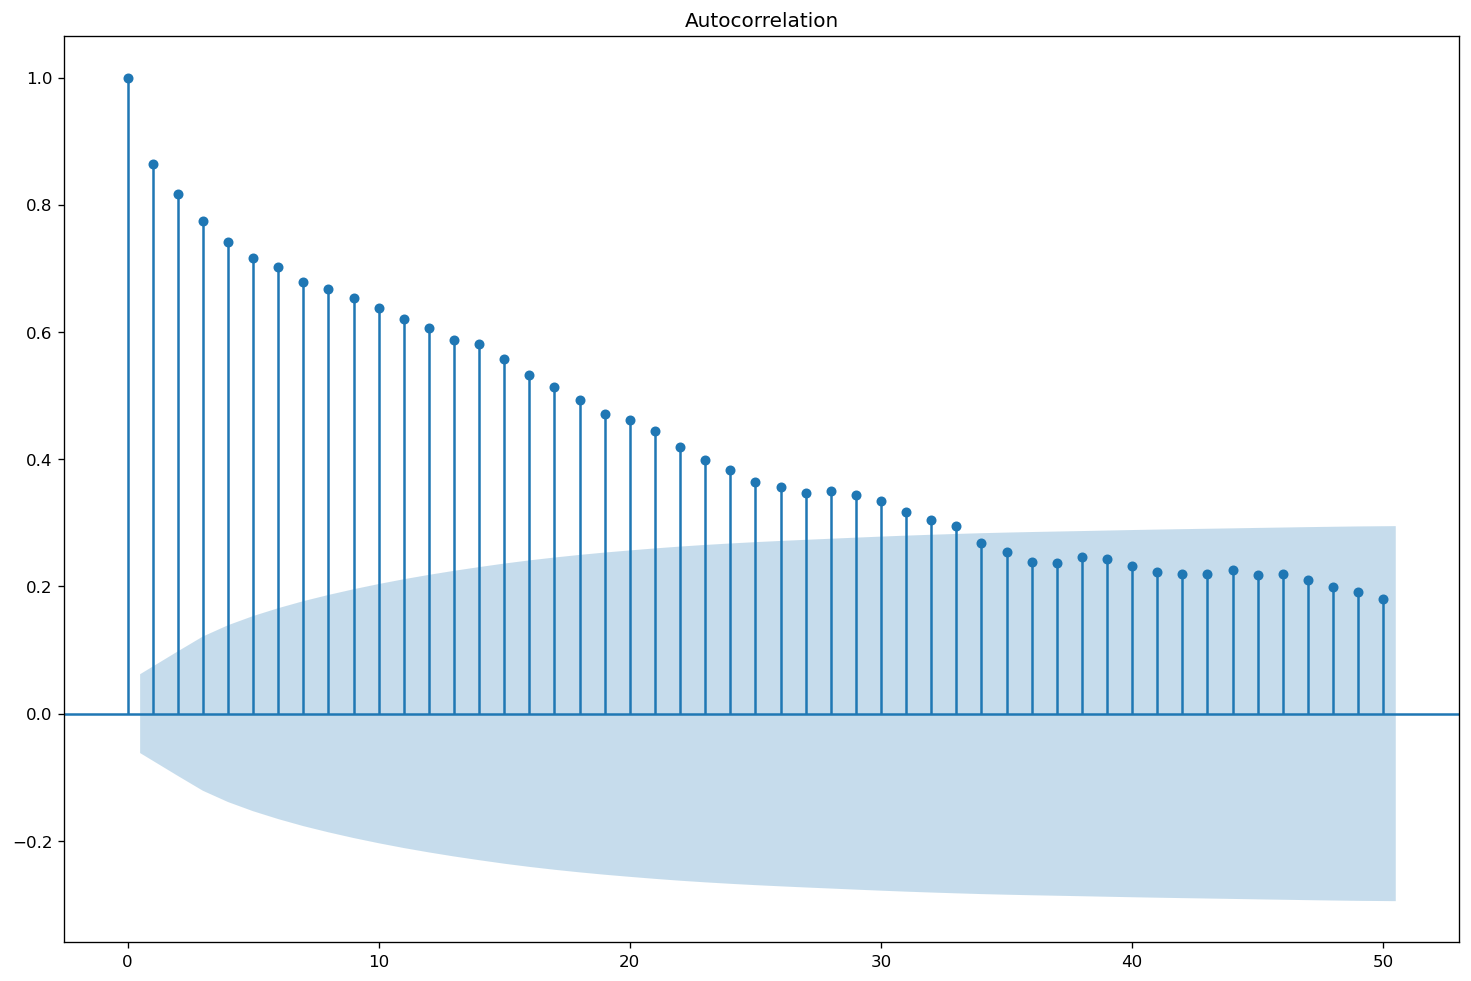

In [573]:
plot_acf(night_clean.distance[:1000], lags = 50);

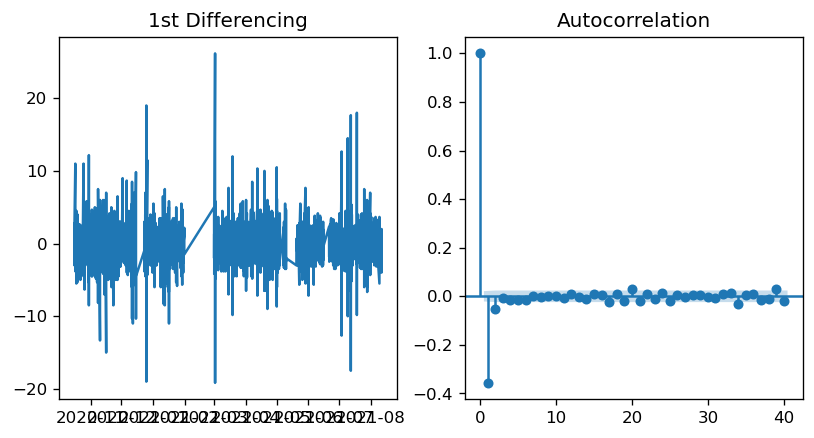

In [623]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(night_clean.distance.diff()); axes[0].set_title('1st Differencing')
plot_acf(night_clean.distance.diff().dropna(), ax=axes[1])

plt.show()

In [791]:
from statsmodels.tsa.stattools import adfuller

series=night_clean.distance
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n')
    
if result[1] < 0.05:
    print("The data is stationary")
else:
    print('The data is not stationary')

ADF Statistic: -5.096782
p-value: 0.000014
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The data is stationary


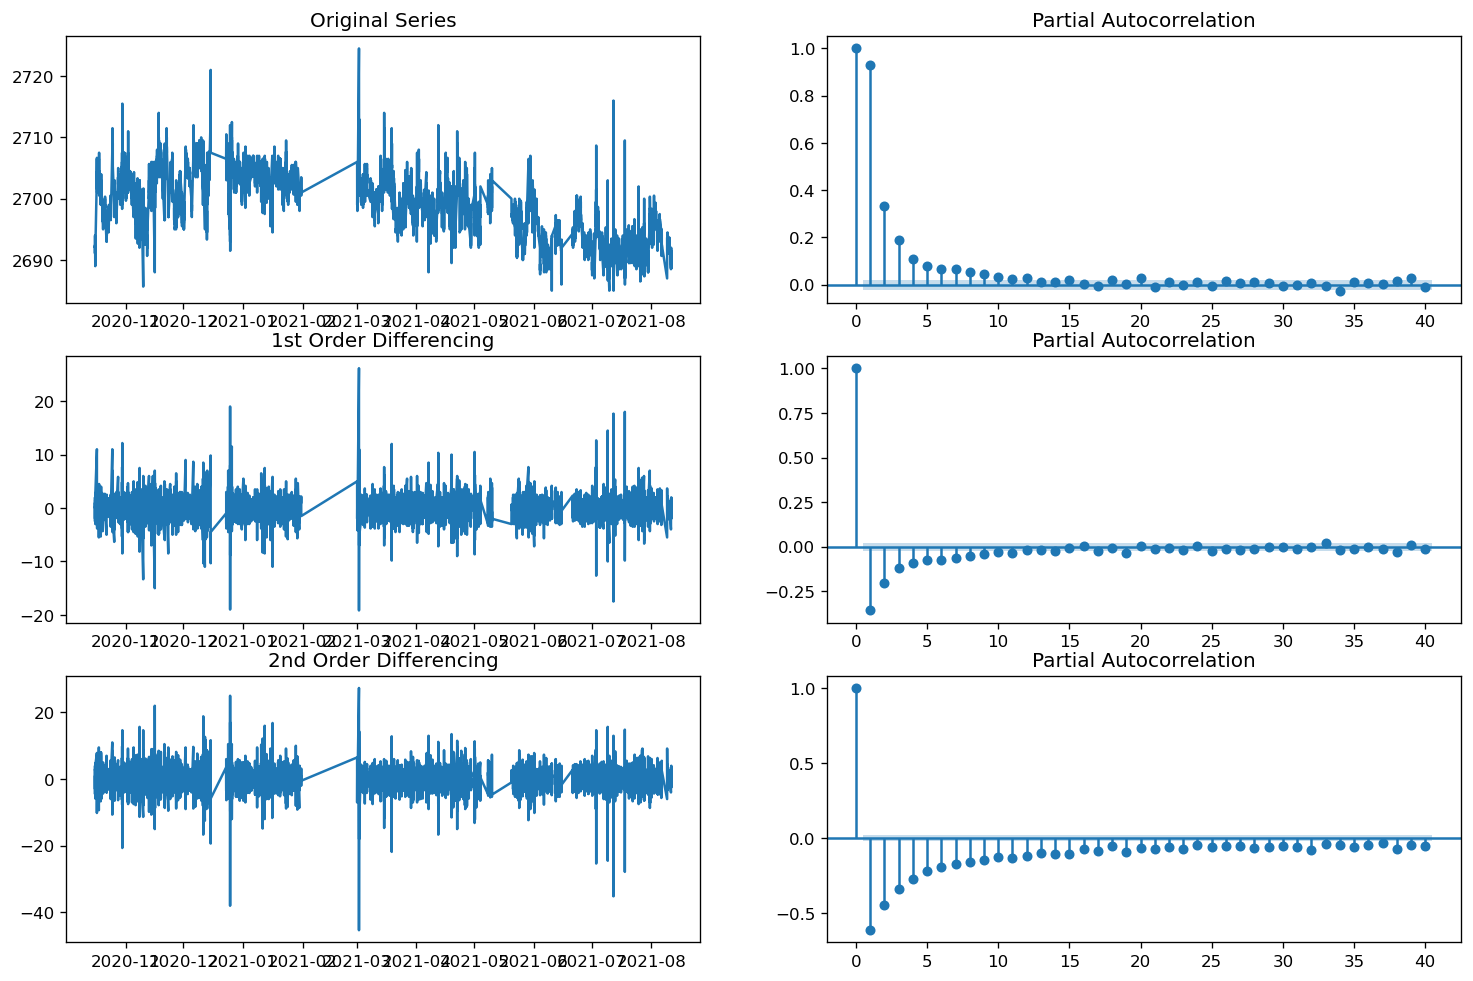

In [792]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(night_clean.distance); axes[0, 0].set_title('Original Series')
plot_pacf(night_clean.distance, ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')
# 1st Differencing
axes[1, 0].plot(night_clean.distance.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(night_clean.distance.diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')
# 2nd Differencing
axes[2, 0].plot(night_clean.distance.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(night_clean.distance.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

                              ARMA Model Results                              
Dep. Variable:               distance   No. Observations:                 4000
Model:                     ARMA(1, 3)   Log Likelihood               -8024.967
Method:                       css-mle   S.D. of innovations              1.799
Date:                Mon, 16 Aug 2021   AIC                          16061.934
Time:                        13:56:44   BIC                          16099.698
Sample:                             0   HQIC                         16075.320
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2702.1426      0.484   5586.651      0.000    2701.195    2703.091
ar.L1.distance     0.9770      0.004    232.434      0.000       0.969       0.985
ma.L1.distance    -0.5340      0.017

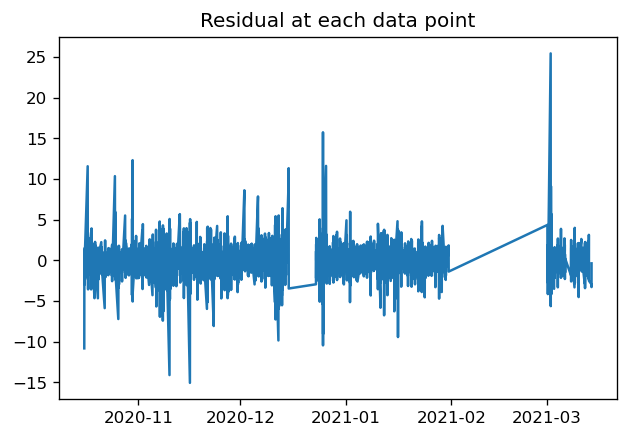

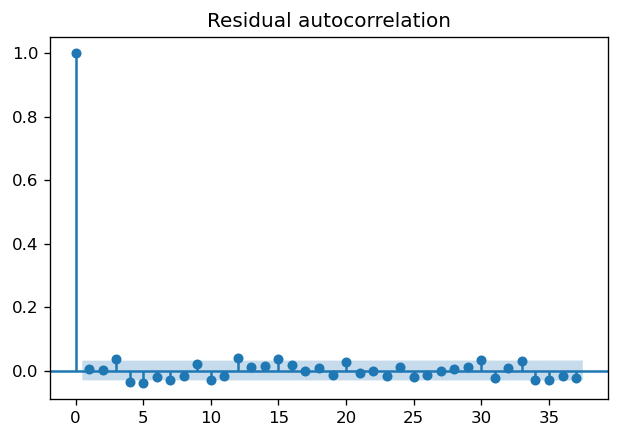

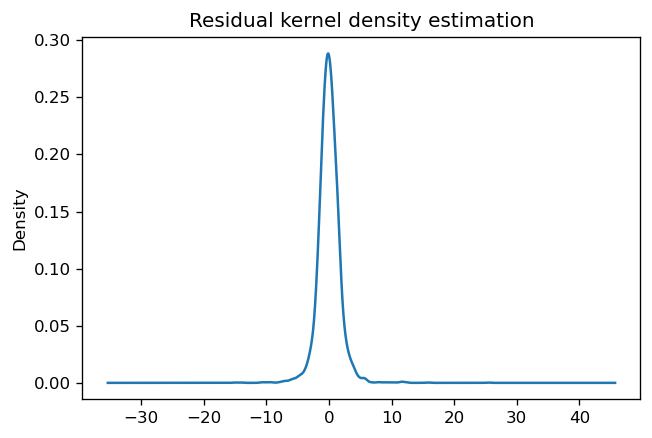

                 0
count  4000.000000
mean      0.009300
std       1.805110
min     -15.050937
25%      -0.916680
50%      -0.034848
75%       0.926689
max      25.454556
p value is  9.412134046730059e-281
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected


In [797]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=3
D=0
Q=1

# fit model
N=4000
series = night_clean['distance']
model = ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
# plt.figure(figsize = (6,4))
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Text(0.5, 1.0, 'Sensor Distance Readings')

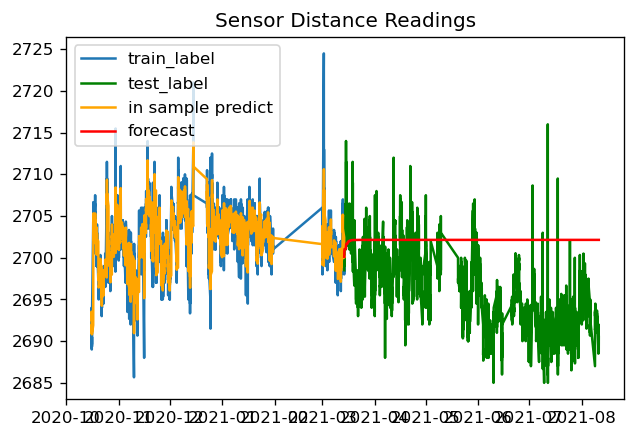

In [800]:
fc, se, conf = model_fit.forecast(steps=len(series)-N, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=night_clean.index[N:])

fig, ax = plt.subplots()
ax.plot(night_clean.index[:N+1],series[:N+1],label='train_label')
ax.plot(night_clean.index[N:],series[N:],color='green',label='test_label')
ax.plot(night_clean.iloc[1:N+1].index,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
ax.plot(fc_series, label='forecast', color='red')
#ax.fill_between(df.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15)
ax.legend(loc='upper left')
plt.title('Sensor Distance Readings')

# ML Testing

In [653]:
#import xgboost
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [943]:
#### Temperature Only

y1 = night_clean['distance']
X_temp = night_clean['Temperature_C']

In [985]:
X_train_temp, X_test_temp, y_train1, y_test1 = train_test_split(X_temp, y1, test_size=0.3)

In [986]:
lm_temp = sm.OLS(y_train1, sm.add_constant(X_train_temp)).fit()
lm_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 1.272e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:58:20   Log-Likelihood:                -14777.
No. Observations:                5951   AIC:                         2.956e+04
Df Residuals:                    5949   BIC:                         2.957e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2704.9225      0.065   4.17e+04      0.000    2704.795    2705.050
Temperature_C    -0.4998      0.004   -112.762      0.000      -0.508      -0.491
==============================================================================
Omnibus:                      357.858   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.269
Skew:                           0.231   Prob(JB):                    2.61e-268
Kurtosis:                       5.181   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [997]:
pred = lm_temp.predict(sm.add_constant(X_test_temp))

r2_score(y_test1, pred)

0.7027607462206482

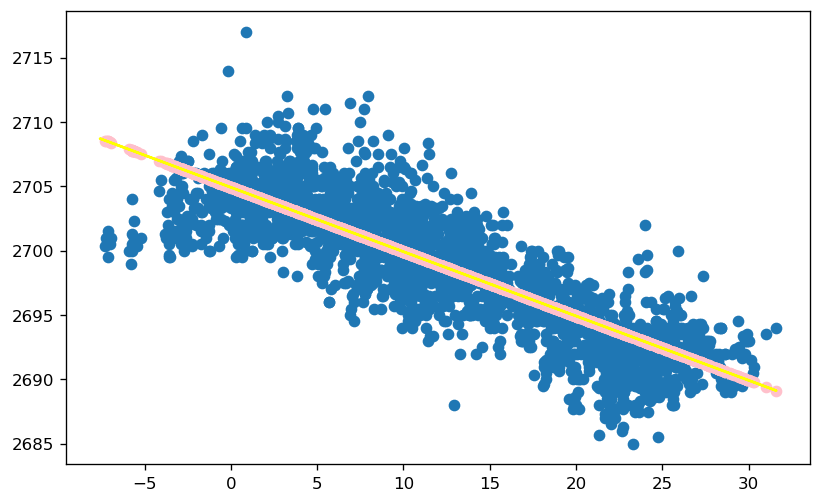

In [998]:
plt.figure(figsize=(8,5))

plt.plot(X_train_temp, lm_temp.params[1]*X_train_temp+lm_temp.params[0], color='yellow')
plt.scatter(X_test_temp, y_test1)
plt.scatter(X_test_temp, pred, color ='pink')


In [991]:
y1 = night_clean['distance']
X1 = night_clean.iloc[:,2:-2]

In [934]:
X_train1 = X1.iloc[:7000]
X_test1 = X1.iloc[7000:]
y_train1 = y1[:7000]
y_test1 = y1[7000:]

In [935]:
model = sm.OLS(y_train1, sm.add_constant(X_train1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:45:50   Log-Likelihood:                -17286.
No. Observations:                7000   AIC:                         3.459e+04
Df Residuals:                    6990   BIC:                         3.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2721.3707      5.551    490.231      0.000    2710.489    2732.253
Temperature_C      -0.6339      0.062    -10.286      0.000      -0.755      -0.513
Dew_Point_C         0.1983      0.064      3.075      0.002       0.072       0.325
Humidity_%         -0.0498      0.014     -3.527      0.000      -0.078      -0.022
Wind               -0.0001      0.001     -0.211      0.833      -0.001       0.001
Speed_kmh          -0.2385      0.141     -1.689      0.091      -0.515       0.038
Gust_kmh            0.2178      0.101      2.166      0.030       0.021       0.415
Pressure_hPa       -0.0124      0.005     -2.398      0.017      -0.022      -0.002
Precip_Rate_mm     -0.1180      0.042     -2.843      0.004      -0.199      -0.037
Precip_Accum_mm     0.0341      0.008      4.173      0.000       0.018       0.050
==============================================================================
Omnibus:                      164.412   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.576
Skew:                           0.056   Prob(JB):                     1.25e-81
Kurtosis:                       4.125   Cond. No.                     1.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Logistic Regression Coefficients')

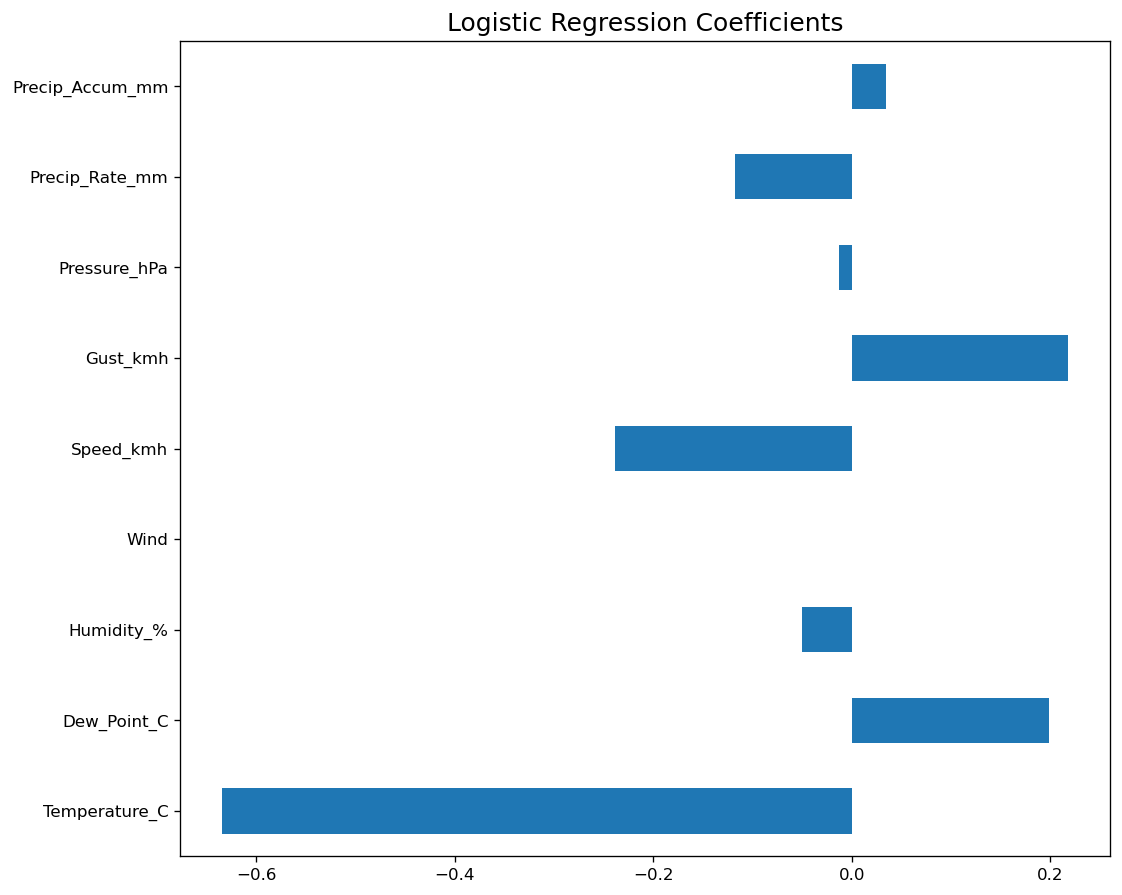

In [928]:
model.params[1:].plot.barh()
plt.title('Logistic Regression Coefficients', fontsize=15)

In [995]:
y_pred = model_day.predict(sm.add_constant(X))

r2_score(y,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8502, 248]

In [ ]:
plt.scatter(x_1, y, s=3)
m, b = np.polyfit(x_1, y, 1)
plt.plot(x_1, m*x_1 + b, color='red')
plt.title('Temperature (C) vs Distance Reading')
plt.xlabel('Temperature(C)')
plt.ylabel('Distance')

In [587]:
df = night_clean.copy()
for i in range(1,31):
    df.insert(df.shape[1],f'distance_lag_{i}', df.distance.shift(i))

df = df.dropna()

In [588]:
scaler = StandardScaler()
night_scaled = pd.DataFrame(data=scaler.fit_transform(night_clean), columns=night_clean.columns)

In [589]:
y = df['distance']
X = df.iloc[:,2:]

In [584]:
X.head()

,Temperature_C,Dew_Point_C,Humidity_%,Wind,Speed_kmh,Gust_kmh,Pressure_hPa,Precip_Rate_mm,Precip_Accum_mm,UV,...,distance_lag_21,distance_lag_22,distance_lag_23,distance_lag_24,distance_lag_25,distance_lag_26,distance_lag_27,distance_lag_28,distance_lag_29,distance_lag_30
localtime,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:00:00-04:00,18.140,17.305,95.0,236.25,2.170,3.540,1012.19,0.0,0.0,0.0,...,2691.000000,2693.000000,2692.0,2693.0,2691.5,2694.0,2692.0,2692.333333,2691.500000,2691.333333
2020-10-16 04:10:00-04:00,18.165,17.335,95.0,247.50,1.770,2.900,1012.19,0.0,0.0,0.0,...,2692.000000,2691.000000,2693.0,2692.0,2693.0,2691.5,2694.0,2692.000000,2692.333333,2691.500000
2020-10-16 04:20:00-04:00,18.195,17.360,95.0,258.75,0.805,1.290,1012.19,0.0,0.0,0.0,...,2692.500000,2692.000000,2691.0,2693.0,2692.0,2693.0,2691.5,2694.000000,2692.000000,2692.333333
2020-10-16 04:30:00-04:00,18.280,17.500,95.0,258.75,1.130,2.010,1012.19,0.0,0.0,0.0,...,2691.666667,2692.500000,2692.0,2691.0,2693.0,2692.0,2693.0,2691.500000,2694.000000,2692.000000
2020-10-16 04:40:00-04:00,18.360,17.585,95.0,258.75,1.205,2.095,1012.19,0.0,0.0,0.0,...,2692.000000,2691.666667,2692.5,2692.0,2691.0,2693.0,2692.0,2693.000000,2691.500000,2694.000000


In [590]:
X_train = X.iloc[:7000]
X_test = X.iloc[7000:]
y_train = y.iloc[:7000]
y_test = y.iloc[7000:]

In [592]:
model_lag = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1032.
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:03:32   Log-Likelihood:                -13616.
No. Observations:                7000   AIC:                         2.731e+04
Df Residuals:                    6960   BIC:                         2.759e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             273.7175     25.103     10.904      0.000     224.508     322.927
Temperature_C      -0.0947      0.037     -2.570      0.010      -0.167      -0.022
Dew_Point_C         0.0544      0.038      1.421      0.155      -0.021       0.129
Humidity_%         -0.0126      0.008     -1.498      0.134      -0.029       0.004
Wind                0.0003      0.000      0.972      0.331      -0.000       0.001
Speed_kmh          -0.1769      0.084     -2.108      0.035      -0.342      -0.012
Gust_kmh            0.1419      0.060      2.374      0.018       0.025       0.259
Pressure_hPa       -0.0055      0.003     -1.802      0.072      -0.012       0.000
Precip_Rate_mm     -0.0986      0.025     -3.994      0.000      -0.147      -0.050
Precip_Accum_mm     0.0274      0.005      5.564      0.000       0.018       0.037
UV              -8.103e-16    1.9e-16     -4.275      0.000   -1.18e-15   -4.39e-16
Solar_w/m2      -7.628e-16   1.62e-16     -4.717      0.000   -1.08e-15   -4.46e-16
distance_lag_1      0.4702      0.012     39.298      0.000       0.447       0.494
distance_lag_2      0.1741      0.013     13.165      0.000       0.148       0.200
distance_lag_3      0.0952      0.013      7.109      0.000       0.069       0.121
distance_lag_4      0.0261      0.013      1.943      0.052      -0.000       0.052
distance_lag_5      0.0145      0.013      1.079      0.281      -0.012       0.041
distance_lag_6      0.0148      0.013      1.099      0.272      -0.012       0.041
distance_lag_7      0.0253      0.013      1.886      0.059      -0.001       0.052
distance_lag_8      0.0204      0.013      1.517      0.129      -0.006       0.047
distance_lag_9      0.0193      0.013      1.435      0.151      -0.007       0.046
distance_lag_10     0.0102      0.013      0.755      0.450      -0.016       0.036
distance_lag_11     0.0008      0.013      0.059      0.953      -0.026       0.027
distance_lag_12     0.0232      0.013      1.724      0.085      -0.003       0.049
distance_lag_13    -0.0038      0.013     -0.279      0.780      -0.030       0.023
distance_lag_14     0.0063      0.013      0.468      0.640      -0.020       0.033
distance_lag_15     0.0173      0.013      1.288      0.198      -0.009       0.044
distance_lag_16    -0.0070      0.013     -0.524      0.600      -0.033       0.019
distance_lag_17    -0.0177      0.013     -1.319      0.187      -0.044       0.009
distance_lag_18     0.0034      0.013      0.250      0.803      -0.023       0.030
distance_lag_19    -0.0125      0.013     -0.933      0.351      -0.039       0.014
distance_lag_20     0.0361      0.013      2.690      0.007       0.010       0.062
distance_lag_21    -0.0222      0.013     -1.650      0.099      -0.049       0.004
distance_lag_22    -0.0004      0.013     -0.030      0.976

In [593]:
y_pred = model_lag.predict(sm.add_constant(X_test))

r2_score(y_test,y_pred)

0.5962816359497751

### Day of Week Testing

In [689]:
dist_dow = night_clean.iloc[:,:1]

In [690]:
dist_dow['DOW'] = night_clean.index.dayofweek
dist_dow = dist_dow.join(pd.get_dummies(dist_dow['DOW'])).drop(columns='DOW')

In [691]:
y = dist_dow['distance']
X = dist_dow.iloc[:,1:]

In [692]:
X_train = X.iloc[:7000]
X_test = X.iloc[7000:]
y_train = y.iloc[:7000]
y_test = y.iloc[7000:]

In [693]:
model_dow = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_dow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.864
Date:                Mon, 16 Aug 2021   Prob (F-statistic):            0.00869
Time:                        12:54:21   Log-Likelihood:                -20317.
No. Observations:                7000   AIC:                         4.065e+04
Df Residuals:                    6993   BIC:                         4.070e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2362.7345      0.046   5.12e+04      0.000    2362.644    2362.825
0            337.2707      0.125   2694.468      0.000     337.025     337.516
1            337.4340      0.131   2578.271      0.000     337.177     337.691
2            337.8291      0.133   2543.701      0.000     337.569     338.089
3            337.2470      0.131   2578.001      0.000     336.991     337.503
4            337.5267      0.130   2587.081      0.000     337.271     337.782
5            337.8086      0.126   2690.091      0.000     337.562     338.055
6            337.6183      0.130   2592.396      0.000     337.363     337.874
==============================================================================
Omnibus:                       77.528   Durbin-Watson:                   0.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.967
Skew:                          -0.261   Prob(JB):                     4.32e-18
Kurtosis:                       2.962   Cond. No.                     1.18e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [770]:
scaler = StandardScaler()
day_agg_s = pd.DataFrame(data=scaler.fit_transform(day_agg), columns=day_agg.columns)

In [818]:
y = day_agg_s['distance']
X = day_agg_s['Temperature_C']

In [819]:
X_train = X.iloc[:200]
X_test = X.iloc[200:]
y_train = y.iloc[:200]
y_test = y.iloc[200:]

In [820]:
model_day = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     407.9
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           5.63e-50
Time:                        14:00:47   Log-Likelihood:                -133.42
No. Observations:                 200   AIC:                             270.8
Df Residuals:                     198   BIC:                             277.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0559      0.036      1.556      0.121      -0.015       0.127
Temperature_C    -0.8143      0.040    -20.196      0.000      -0.894      -0.735
==============================================================================
Omnibus:                        4.175   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.301
Skew:                          -0.196   Prob(JB):                        0.116
Kurtosis:                       3.602   Cond. No.                         1.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [821]:
y_pred = model_day.predict(sm.add_constant(X_test))

r2_score(y_test,y_pred)

-0.05169641685083892